In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pyrtools as pt
import plenoptic as po
import scipy.io as sio
import os.path as op


torch.__version__
numpy = lambda x: x.detach().cpu().numpy().squeeze()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.cat([torch.ones(3).flatten(),torch.ones(3).flatten(),torch.ones(3).flatten()])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2]:
image = plt.imread('../data/nuts.pgm').astype(float)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)
pyr = po.simul.Steerable_Pyramid_Freq((256,256), height=3, order=1, is_complex=True)
pp=pyr.forward(im0)
print([val.shape for val in pp.values()])

[torch.Size([1, 1, 256, 256]), torch.Size([1, 1, 256, 256, 2]), torch.Size([1, 1, 256, 256, 2]), torch.Size([1, 1, 128, 128, 2]), torch.Size([1, 1, 128, 128, 2]), torch.Size([1, 1, 64, 64, 2]), torch.Size([1, 1, 64, 64, 2]), torch.Size([1, 1, 32, 32])]


In [3]:
import time
model = po.simul.Portilla_Simoncelli([256,256],n_scales=4, n_orientations=4, Na=5)
image = plt.imread('../data/nuts.pgm').astype(float)
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)

start = time.time()
y = model.forward(im0)
end = time.time()
print(end - start)

print('tmp' in ['tmp','help'])

0.15971994400024414
True


In [ ]:
import glob
directory = '/Users/kathrynbonnen/Dropbox/NYU/Texture2018/imageLibraries/cropped512-gray-jpg/'
jpg = glob.glob(f'{directory}*.jpg')

In [2]:
coeffs = np.ones([2456,len(jpg)])
model = po.simul.Portilla_Simoncelli([512,512],n_scales=4, n_orientations=4, Na=9)
cnt = 0
for ind,file in enumerate(jpg):
    print(f'{ind}: {file}')
    image = plt.imread(file).astype(float).mean(axis=2)/255.
    if image.shape[0]==512 and image.shape[1] == 512:
        im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)
        coeffs[:,cnt] = model.forward(im0).detach().numpy()
        
        cnt+=1
coeffs = coeffs[:,:cnt]

NameError: name 'np' is not defined

In [13]:
np.save('coeff_library_512',coeffs)

In [14]:

coeffs = np.load('coeff_library_512.npy')
coeffs_mean = torch.from_numpy(coeffs.mean(axis=1))
coeffs_std = torch.from_numpy(coeffs.std(axis=1))
coeffs_std[coeffs_std<1e-3]=1

In [17]:
# image = plt.imread('../data/nuts.pgm').astype(float)/255.
# im0 = torch.tensor(image[:256,:256], requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    

image = plt.imread(directory+'5DmkII_3975.jpg').astype(float).mean(axis=2)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    
model = po.simul.Portilla_Simoncelli([512,512],n_scales=4, n_orientations=4, Na=9,
                                     normalize=True, normalization_mu=coeffs_mean, normalization_std=coeffs_std)
met = po.synth.Metamer(im0, model)
m=met.synthesize(learning_rate=10,loss_thresh=20,loss_change_thresh=100,max_iter=400,coarse_to_fine='together')



  5%|▌         | 20/400 [00:45<14:31,  2.29s/it, current_scale=pixel_statistics, current_scale_loss=16.8, gradient_norm=3.2361e+00, learning_rate=10, loss=7.0644e+03]


KeyboardInterrupt: 

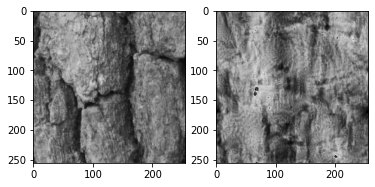

In [9]:
fig=plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(image[:256,:256],cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,2,2)
plt.imshow(m[0].squeeze().detach().numpy(),cmap='gray',vmin=0,vmax=1)

In [5]:
[s for s in [0,1,2,3] for i in range(0,3)]

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]